<a href="https://colab.research.google.com/github/imemmul/TensorFlow-Notes/blob/main/Natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0a5cc22a-b17a-92aa-2bc7-2b42d8ad5afb)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-09-05 18:56:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-05 18:56:56 (63.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-09-05 18:56:59--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-09-05 18:57:00 (46.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data("nlp_getting_started.zip")

### Visualizing a text dataset

In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
len(train_df)

7613

In [10]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real_disaster)" if target > 0 else "(not_real_disaster")
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 1 (real_disaster)
Text: 
I-77 Mile Marker 31 South Mooresville  Iredell Vehicle Accident Ramp Closed at 8/6 1:18 PM

---

Target: 0 (not_real_disaster
Text: 
@abandonedpics You should delete this one it's not an abbandoned nor sinking. ThatÛªs the darsena of the Castello scaligero di Sirmione.

---

Target: 1 (real_disaster)
Text: 
MH370 victim's family furious the media was told about wreckage confirmation first http://t.co/carMqiVkwU

---

Target: 0 (not_real_disaster
Text: 
Real Hip Hop: Apollo Brown Feat M.O.P. - Detonate 
#JTW http://t.co/cEiaO1TEXr

---

Target: 0 (not_real_disaster
Text: 
Do you know the emergency plan at your workplace? If not ask your supervisor or operations manager. #Retail

---



### Splitting data into and validation sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences)

(6851, 6851, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [15]:
max = 0
index = 0
for i in range(len(train_sentences)):
  if len(train_sentences[i].split()) > max:
    max = len(train_sentences[i].split())
    index = i
max, index

(31, 318)

In [16]:
len(train_sentences[318].split())

31

### Text Vectorization(tokenization)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [19]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# Fitting the text vectorizer

text_vectorizer.adapt(train_sentences)

In [22]:
sample_sent = "I a fire in next building!"
text_vectorizer([sample_sent])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8,   3,  42,   4, 274, 630,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"org text : \n {random_sentence} \
\n\n Vectorized:\n")
text_vectorizer([random_sentence])

org text : 
 @AlexJacobsonPFS All Andre and Gore have to do is not fall off the cliff and we're elite on that side of the ball. 

 Vectorized:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,  44,   1,   7,   1,  24,   5,  68,   9,  34, 278, 102,   2,
        403,   7]])>

In [24]:
words_in_vocabs = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocabs[:5]
bottom_5_words = words_in_vocabs[-5:]
print(f"top 5: \n {top_5_words}")
print(f"bottom5: \n {bottom_5_words}")

top 5: 
 ['', '[UNK]', 'the', 'a', 'in']
bottom5: 
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating and embedding using embedding layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)
embedding

In [26]:
embedding.weights

[]

In [27]:
random_sentence = random.choice(train_sentences)
print(f"org text:\n {random_sentence} \n Embedded: \n")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

org text:
 'Food crematoria' in Russia provoke outrage amid crisis famine memories
http://t.co/FelR5a1hBP 
 Embedded: 



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04135497,  0.04275812,  0.04943034, ...,  0.01967895,
          0.04420861,  0.03354868],
        [ 0.00458499,  0.03780201, -0.01994306, ..., -0.00055314,
         -0.02471858, -0.01476099],
        [ 0.01289909,  0.01333741,  0.02785746, ..., -0.03269788,
          0.00865165, -0.00752146],
        ...,
        [-0.00431061,  0.04238851, -0.02648196, ..., -0.00082462,
         -0.02473031,  0.00382905],
        [-0.00431061,  0.04238851, -0.02648196, ..., -0.00082462,
         -0.02473031,  0.00382905],
        [-0.00431061,  0.04238851, -0.02648196, ..., -0.00082462,
         -0.02473031,  0.00382905]]], dtype=float32)>

In [28]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04135497,  0.04275812,  0.04943034,  0.02097164,  0.04116121,
        -0.02322785,  0.04436508,  0.00068603,  0.0362362 , -0.00960821,
         0.03042777, -0.03940932, -0.00011748,  0.02603774,  0.01691392,
        -0.02876908,  0.04037249, -0.0286167 ,  0.00640411, -0.02915974,
         0.03333337,  0.04925859, -0.04284124,  0.0057397 ,  0.01785627,
        -0.03066068, -0.00878432, -0.0412485 ,  0.00896149,  0.00981255,
         0.0360278 , -0.04169564,  0.02297324,  0.04894794, -0.04072233,
         0.01742205, -0.02816367, -0.02741336, -0.0365953 , -0.04900322,
        -0.04596865,  0.00072206,  0.01516939,  0.03193036,  0.02812788,
         0.02628301,  0.01955895, -0.01456659,  0.00196254, -0.03892394,
         0.01246802, -0.0319672 ,  0.01877569, -0.04301871, -0.01183772,
         0.02940715,  0.01833929, -0.02855027, -0.01196503,  0.03811124,
         0.04270189, -0.0399259 ,  0.03704312,  0.00073916, -0.02904391,
  

### Modelling experiments and tutorial

* Model 0 : Naive Bayes
* Model 1 : Dense model
* Model 2 : LSTM model
* Model 3 : GRU model
* Model 4 : Bidirectional-LTSM
* Model 5 : 1D CNN
* Model 6 : TF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [30]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score * 100

79.26509186351706

In [32]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [237]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [35]:
baseline_results = calculate_results(val_labels, baseline_preds)

### Model 1 : Dense model

In [36]:
from helper_functions import create_tensorboard_callback
LOG_DIR = "model_logs"

In [37]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [38]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [39]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=LOG_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220905-185707
Epoch 1/5
215/215 [==============================] - 6s 5ms/step - loss: 0.6123 - accuracy: 0.6824 - val_loss: 0.5357 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4423 - accuracy: 0.8194 - val_loss: 0.4724 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8645 - val_loss: 0.4591 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2842 - accuracy: 0.8889 - val_loss: 0.4649 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2379 - accuracy: 0.9117 - val_loss: 0.4781 - val_accuracy: 0.7874


In [41]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7874


[0.4781145751476288, 0.787401556968689]

In [42]:
model_1_pred_probs = model_1.predict(val_sentences)

In [43]:
model_1_pred_probs[:10]

array([[0.3580458 ],
       [0.6977424 ],
       [0.9978422 ],
       [0.10212458],
       [0.1014096 ],
       [0.9373665 ],
       [0.9288375 ],
       [0.9924211 ],
       [0.96301633],
       [0.22501254]], dtype=float32)

In [44]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [45]:
model_1_preds.shape

TensorShape([762])

In [46]:
model_1_results = calculate_results(val_labels,
                                    model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7923216200196284,
 'recall': 0.7874015748031497,
 'f1': 0.7844114973523961}

In [47]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [48]:
words_in_vocabs

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [49]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [51]:
embedd_weights = model_1.get_layer(name="embedding")

In [52]:
embed_weights = embedd_weights.get_weights()[0]


In [53]:
embed_weights.shape

(10000, 128)

In [54]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocabs):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

"LSTM = long short memory"

### Model 2 building

In [55]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x)
#print(x.shape)
x = layers.LSTM(64)(x)
# x = layers.GlobalAveragePooling1D()(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
# x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
#print(outputs.shape)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [56]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [57]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=LOG_DIR,
                                                                     experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220905-185735
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.2178 - accuracy: 0.9210 - val_loss: 0.5712 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1549 - accuracy: 0.9409 - val_loss: 0.6554 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1311 - accuracy: 0.9510 - val_loss: 0.6994 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1070 - accuracy: 0.9584 - val_loss: 0.7216 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0848 - accuracy: 0.9663 - val_loss: 0.9929 - val_accuracy: 0.7730


In [59]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[5.5161836e-03],
       [6.8412930e-01],
       [9.9981087e-01],
       [4.4406880e-02],
       [5.8696762e-04],
       [9.9949527e-01],
       [9.1496712e-01],
       [9.9987793e-01],
       [9.9979073e-01],
       [7.0191646e-01]], dtype=float32)

In [60]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [61]:
model_2_results = calculate_results(val_labels,
                                    model_2_preds)

In [62]:
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7745161732477092,
 'recall': 0.7729658792650919,
 'f1': 0.7709704727215051}

In [63]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3 building
Gonna use tf.keras.layers.GRU

In [64]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.LSTM(64)(x)
# x = layers.GRU(64, return_sequences=True)(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid", name="mdoel_3_output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [65]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 mdoel_3_output_layer (Dense  (None, 1)                65        
 )                                                               
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-train

In [66]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220905-185747
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1574 - accuracy: 0.9384 - val_loss: 0.8000 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0868 - accuracy: 0.9685 - val_loss: 0.8110 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0713 - accuracy: 0.9731 - val_loss: 1.0760 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0647 - accuracy: 0.9747 - val_loss: 1.0294 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0561 - accuracy: 0.9766 - val_loss: 1.1280 - val_accuracy: 0.7756


In [68]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

array([[9.57536104e-04],
       [7.86058366e-01],
       [9.99816477e-01],
       [1.04687354e-02],
       [1.42940029e-04],
       [9.99589264e-01],
       [7.69439936e-01],
       [9.99942183e-01],
       [9.99885321e-01],
       [8.15035760e-01],
       [3.27714864e-04],
       [8.58596742e-01],
       [4.75658162e-04],
       [1.19535372e-01],
       [1.17099313e-04],
       [2.18323898e-03],
       [6.01909007e-04],
       [3.65486165e-04],
       [2.79641291e-03],
       [9.99774039e-01],
       [9.99861002e-01],
       [7.74478758e-05],
       [9.99762475e-01],
       [1.42120349e-03],
       [9.99884129e-01],
       [9.99896884e-01],
       [6.57482888e-04],
       [7.99952890e-04],
       [2.39482644e-04],
       [8.43921304e-02],
       [9.87942874e-01],
       [8.26400938e-04],
       [1.69403449e-01],
       [1.49813911e-03],
       [7.05983043e-01],
       [6.32544607e-02],
       [9.99769270e-01],
       [5.06225601e-02],
       [1.71510484e-02],
       [9.99890327e-01],


In [69]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [70]:
model_3_results = calculate_results(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 77.55905511811024,
 'precision': 0.7790436087799748,
 'recall': 0.7755905511811023,
 'f1': 0.7728084240126466}

### Model 4 building

In [71]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs ,outputs, name="model_4_bidirectinal")

In [72]:
model_4.summary()

Model: "model_4_bidirectinal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [73]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [75]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220905-190044
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.1109 - accuracy: 0.9693 - val_loss: 0.9015 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0552 - accuracy: 0.9761 - val_loss: 1.2488 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0467 - accuracy: 0.9794 - val_loss: 1.3006 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9810 - val_loss: 1.3057 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0396 - accuracy: 0.9809 - val_loss: 1.5847 - val_accuracy: 0.7690


In [76]:
model_4_pred_probs = model_4.predict(val_sentences)

In [77]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [78]:
model_4_results = calculate_results(val_labels,
                                    model_4_preds)

In [79]:
model_4_results, baseline_results

({'accuracy': 76.9028871391076,
  'precision': 0.7692529451017919,
  'recall': 0.7690288713910761,
  'f1': 0.7677604393034507},
 {'accuracy': 79.26509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549})

### Model 5 building

In [86]:
embedding_test = embedding(text_vectorizer(["this is test"]))
conv1d = layers.Conv1D(filters=32,
                       kernel_size=5,
                       strides=1,
                       activation="relu",
                       padding="same")
output = conv1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(output)

embedding_test.shape, output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [95]:
inputs = layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
print(outputs.shape)
model_5 = tf.keras.Model(inputs, outputs)

(None, 1)


In [96]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [98]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_9 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [97]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20220905-193046
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.0881 - accuracy: 0.9740 - val_loss: 1.0586 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0527 - accuracy: 0.9797 - val_loss: 1.1327 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0489 - accuracy: 0.9797 - val_loss: 1.1961 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0452 - accuracy: 0.9806 - val_loss: 1.2422 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0452 - accuracy: 0.9796 - val_loss: 1.2352 - val_accuracy: 0.7520


In [99]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [100]:
model_5_results = calculate_results(val_labels,
                                    model_5_preds)

In [101]:
model_5_results

{'accuracy': 75.19685039370079,
 'precision': 0.7515527438106716,
 'recall': 0.7519685039370079,
 'f1': 0.7516029615774639}

## Model 6 building

In [108]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [111]:
sample_sentence = "There is a flood in my street!"

In [112]:
embed_samples = embed([sample_sentence,
                      "When you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [115]:
print(embed_samples.shape)

(2, 512)


In [116]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068853  0.02425464 -0.01405769  0.01434427  0.08292627
  0.0196337   0.06160139 -0.00352701 -0.01216416  0.00978647 -0.01248499
  0.01232347  0.09748451  0.06141113 -0.03728353  0.01860887 -0.04669852
  0.00413913 -0.06363907 -0.02469897  0.02713692  0.02284444 -0.00210029
 -0.00630592 -0.03964961  0.02220407  0.00115074 -0.03132182  0.00119528
 -0.0401255   0.04561896 -0.01530598 -0.00175914  0.02173134 -0.08450425
  0.03340027  0.04604555 -0.02480251 -0.08681663  0.00702696 -0.00770477
 -0.01434537  0.07814164 -0.10676058 -0.05152996 -0.00858158 -0.0323223
 -0.03871096  0.02581472], shape=(50,), dtype=float32)


In [117]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [170]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_6_USE")
])

In [171]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [172]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_13 (Dense)            (None, 64)                32832     
                                                                 
 model_6_USE (Dense)         (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [173]:
model_6_history = model_6_history = model_6.fit(train_sentences,
                                                train_labels,
                                                epochs=5,
                                                validation_data=(val_sentences, val_labels),
                                                callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                                      "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20220905-203022
Epoch 1/5
215/215 [==============================] - 5s 20ms/step - loss: 0.5111 - accuracy: 0.7809 - val_loss: 0.4482 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4164 - accuracy: 0.8107 - val_loss: 0.4389 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4015 - accuracy: 0.8225 - val_loss: 0.4332 - val_accuracy: 0.8084
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3924 - accuracy: 0.8278 - val_loss: 0.4305 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3852 - accuracy: 0.8291 - val_loss: 0.4263 - val_accuracy: 0.8150


In [238]:
model_6_pred_probs = model_6.predict(val_sentences)

In [239]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [240]:
model_6_results = calculate_results(val_labels,
                                    model_6_preds)
model_6_results, baseline_results

({'accuracy': 81.49606299212599,
  'precision': 0.8161852632862286,
  'recall': 0.8149606299212598,
  'f1': 0.8138139523860313},
 {'accuracy': 79.26509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549})

### Model 7 building

In [228]:
train_10 = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
train_sentences_10 = train_10["text"].to_list()
train_labels_10 = train_10["target"].to_list()
len(train_labels_10), len(train_sentences_10)

(761, 761)

In [229]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_6_USE")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7_history = model_7.fit(train_sentences_10,
                              train_labels_10,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_7_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20220905-212842
Epoch 1/5
24/24 [==============================] - 2s 41ms/step - loss: 0.6718 - accuracy: 0.6781 - val_loss: 0.6335 - val_accuracy: 0.7992
Epoch 2/5
24/24 [==============================] - 1s 24ms/step - loss: 0.5999 - accuracy: 0.7989 - val_loss: 0.5545 - val_accuracy: 0.8097
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5242 - accuracy: 0.8042 - val_loss: 0.4871 - val_accuracy: 0.8097
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4696 - accuracy: 0.8081 - val_loss: 0.4405 - val_accuracy: 0.8189
Epoch 5/5
24/24 [==============================] - 1s 24ms/step - loss: 0.4321 - accuracy: 0.8200 - val_loss: 0.4105 - val_accuracy: 0.8255


In [224]:
from sklearn.metrics import precision_score

In [241]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 82.54593175853019,
 'precision': 0.8256179935749094,
 'recall': 0.8254593175853019,
 'f1': 0.8249028706511805}

In [231]:
precision_score(val_labels, model_7_preds)

0.8287461773700305

In [189]:
model_7_results

{'accuracy': 82.67716535433071,
 'precision': 0.8269995599202095,
 'recall': 0.8267716535433071,
 'f1': 0.8261862632854258}

In [176]:
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8196403099324437,
 'recall': 0.8175853018372703,
 'f1': 0.8161793631328899}

#### So up there while creating 10 percent data splits there is something called "data leakage".
While creating splits we also included validation data somehow so we have to fix that

In [209]:
import numpy as np

In [196]:
train_10_split = int(0.1 * len(train_sentences))
train_sentences_10_fixed = train_sentences[:train_10_split]
train_labels_10_fixed = train_labels[:train_10_split]

In [210]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [213]:
model_8 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_8_USE")
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_8_history = model_8.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_8_10_percent_fixed_split")])

Saving TensorBoard log files to: model_logs/model_8_10_percent_fixed_split/20220905-212110
Epoch 1/5
22/22 [==============================] - 2s 41ms/step - loss: 0.6703 - accuracy: 0.7055 - val_loss: 0.6504 - val_accuracy: 0.7100
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5992 - accuracy: 0.8120 - val_loss: 0.5938 - val_accuracy: 0.7402
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5202 - accuracy: 0.8047 - val_loss: 0.5410 - val_accuracy: 0.7585
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4555 - accuracy: 0.8236 - val_loss: 0.5062 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4099 - accuracy: 0.8382 - val_loss: 0.4908 - val_accuracy: 0.7730


In [242]:
model_8_pred_probs = model_8.predict(val_sentences)
model_8_preds = tf.squeeze(tf.round(model_8_pred_probs))
model_8_results = calculate_results(y_true=val_labels,
                                    y_pred=model_8_preds)
model_8_results

{'accuracy': 77.29658792650919,
 'precision': 0.7770640736660165,
 'recall': 0.7729658792650919,
 'f1': 0.7698502254147366}

why model_8 calculation is so low ???

In [246]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "model_1": model_1_results,
                                  "model_2": model_2_results,
                                  "model_3": model_3_results,
                                  "model_4":model_4_results,
                                  "model_5":model_5_results,
                                  "model_6":model_6_results,
                                  "model_8":model_8_results})

In [249]:
all_model_results = all_model_results.transpose()

In [250]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
model_1,0.787402,0.792322,0.787402,0.784411
model_2,0.772966,0.774516,0.772966,0.770970
model_3,0.775591,0.779044,0.775591,0.772808
model_4,0.769029,0.769253,0.769029,0.767760
model_5,0.751969,0.751553,0.751969,0.751603
model_6,0.814961,0.816185,0.814961,0.813814
model_8,0.772966,0.777064,0.772966,0.769850


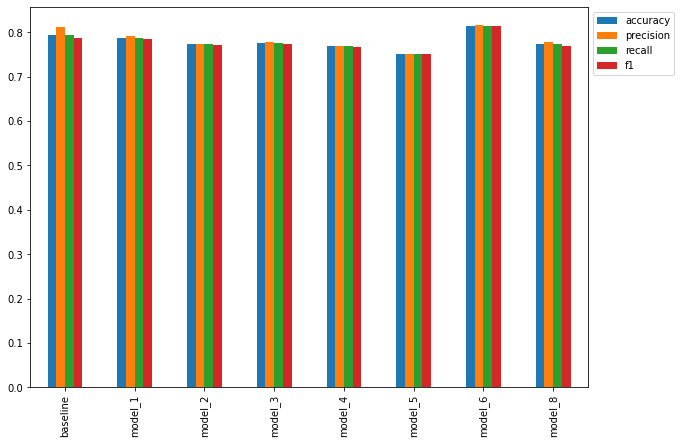

In [251]:
all_model_results.plot(kind="bar",
                       figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));